In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# Concept and uses of the inverse

In [2]:
# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)

# compute its inverse
Ainv = np.linalg.inv(A)

# and check the multiplication
idm = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(idm)

[[ 1.00000000e+00 -1.58604297e-18  1.96029875e-17]
 [ 3.08838379e-17  1.00000000e+00  1.66645107e-16]
 [-9.77199139e-18 -2.75912069e-17  1.00000000e+00]]


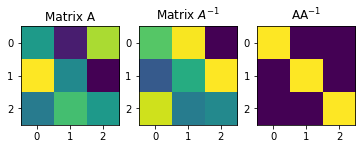

In [3]:
# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(idm)
plt.title('AA$^{-1}$')

plt.show()

In [4]:
# Code Practice 1: Calculate the inverse by actual method adj(A)/|A|
# MCA algorithm in code

m = 4
A = np.random.randint(10, size=(m,m))

# Minors Matrix
minors = np.zeros((m,m))
H = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        
        # select rows and columns
        rows = [True]*m
        rows[i] = False
        
        cols = [True]*m
        cols[j] = False
        
        # compute minor matrix
        minors[i,j] = np.linalg.det(A[rows, :][:, cols])
        
        # compute H
        H[i,j] = (-1)**(i+j)

# Cofactor matrix
C = H*minors

# adjugate matrix
adjA = C.T

# Inverse of A
Ainv = adjA/np.linalg.det(A)

print("Matrix A: \n", A)
print()
print("Matrix A inverse: \n", Ainv)
print()
print("A*Ainv: \n", np.round(A@Ainv))

Matrix A: 
 [[1 7 6 0]
 [0 2 5 3]
 [2 5 5 0]
 [8 6 5 7]]

Matrix A inverse: 
 [[-0.36585366 -0.10670732  0.5         0.04573171]
 [ 0.48780488 -0.14939024 -0.5         0.06402439]
 [-0.34146341  0.19207317  0.5        -0.08231707]
 [ 0.24390244  0.11280488 -0.5         0.0945122 ]]

A*Ainv: 
 [[ 1.  0.  0. -0.]
 [ 0.  1.  0. -0.]
 [-0.  0.  1. -0.]
 [-0. -0.  0.  1.]]


# Computing the inverse via row reduction

In [5]:
# matrix size
m = 4

# random integers matrix
A = Matrix(np.random.randint(10, size=(m,m)))
print("MAtrix A: \n", np.array(A))
print()

# augment A and identity
Aaug = Matrix(np.concatenate((A, np.eye(m,m)),axis=1))
print("Augmented matrix: \n", np.array(Aaug))
print()
print('Size of augmented matrix:',Aaug.shape)
print()

# calculating rref of augmented matrix
Asol = Aaug.rref()
Asol = Asol[0]
# extracting the inverse from augmented matrix(second part)
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()
print("Difference between inverse computed by rref method and by sympy inverse function: \n", np.array(Ainvrref - Ainv))

MAtrix A: 
 [[0 7 9 9]
 [5 6 9 2]
 [3 7 4 1]
 [8 4 2 9]]

Augmented matrix: 
 [[0 7 9 9 1.00000000000000 0.0 0.0 0.0]
 [5 6 9 2 0.0 1.00000000000000 0.0 0.0]
 [3 7 4 1 0.0 0.0 1.00000000000000 0.0]
 [8 4 2 9 0.0 0.0 0.0 1.00000000000000]]

Size of augmented matrix: (4, 8)

Difference between inverse computed by rref method and by sympy inverse function: 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


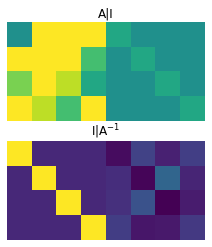

In [6]:
# show the augemented matrices
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug,dtype='float'),vmin=-5,vmax=5)
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()

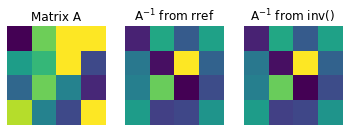

In [7]:
# show the square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

plt.show()

In [8]:
# Code Practice 2: Inverse of a diagonal matrix

# diagonal matrices, and their inverses
# create some diagonal matrices
m = 5
A = np.random.randn(m,m)
I = np.eye(m,m)

# Diagonal Matrix using Hadamard multiplication 
DiaMat = A*I
print(DiaMat)
print()

# another way of creating a diagonal matrix
# DiaMat = np.diag(np.arange(1, 6))

# compute their inverses (condition on the diagonal matrix for invertibility)
DiaMatInv = np.linalg.inv(DiaMat)
print(np.array(DiaMatInv))

[[-0.86369681  0.         -0.          0.         -0.        ]
 [-0.          0.42916832 -0.         -0.         -0.        ]
 [ 0.          0.         -0.13451898 -0.          0.        ]
 [ 0.         -0.          0.          0.28643463  0.        ]
 [ 0.          0.          0.         -0.         -1.32905431]]

[[-1.1578137  -0.         -0.         -0.         -0.        ]
 [ 0.          2.33008811  0.          0.          0.        ]
 [-0.         -0.         -7.43389499 -0.         -0.        ]
 [ 0.          0.          0.          3.49119797  0.        ]
 [-0.         -0.         -0.         -0.         -0.7524147 ]]


In [9]:
# Code Practice 3: One sided inverse

m = 6
n = 3

# create matrix
A = np.random.randn(m,n)
print("MAtrix A: \n", A)
print()

AtA = A.T@A       # for left side inverse
AAt = A@A.T       # for right side inverse

# inspect rank
print("Rank of A: ", np.linalg.matrix_rank(A))
print("Rank of A'A: ", np.linalg.matrix_rank(AtA))
print("Rank of AA': ", np.linalg.matrix_rank(AAt))
print()

# Left inverse
Aleft = np.linalg.inv(AtA)@A.T
print("Left Inverse of A: \n", Aleft)
print()

# Right inverse
Aright = A.T@np.linalg.inv(AAt)
print("Right Inverse of A: \n", Aright)
print()

# test
Ileft = Aleft@A
Iright = A@Aright

print(np.round(Ileft))
print()
print(Iright)

MAtrix A: 
 [[ 0.0995409   0.28370914 -0.05729269]
 [-1.17939835  1.3899992  -0.55140317]
 [-1.39353532 -0.43271141  1.80959511]
 [-0.88761733 -1.0141663   1.9264426 ]
 [ 0.16947942 -1.32316903  0.1800591 ]
 [-1.30373254 -0.31918358  0.93412266]]

Rank of A:  3
Rank of A'A:  3
Rank of AA':  3

Left Inverse of A: 
 [[ 0.18364992 -0.48373083  0.00220275  0.13592266 -0.46027662 -0.47013654]
 [ 0.21914007  0.00495121  0.15208204  0.08084287 -0.74245424 -0.30186099]
 [ 0.2083797  -0.34652209  0.29725459  0.35413827 -0.61340444 -0.30919193]]

Right Inverse of A: 
 [[-4.          5.13086275  0.5         1.27254485 -0.46688724 -8.        ]
 [-3.          2.36865631  0.          1.01842825  0.46492165 -2.        ]
 [ 0.          0.26967188  0.5        -1.13236321 -0.38842141 -2.        ]]

[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]

[[-1.24929101  1.1672899   0.02112411  0.48048379  0.10768185 -1.24916009]
 [ 0.5475958  -2.90759862 -0.86540076  0.53916581  1.41106356  7.75799472]
 [ 6.872275

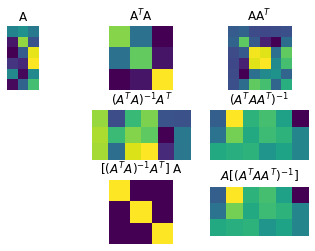

In [10]:
# show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$(A^TAA^T)^{-1}$')

plt.subplot(338)
plt.imshow(Ileft), plt.axis('off')
plt.title('[$(A^TA)^{-1}A^T$] A')

plt.subplot(339)
plt.imshow(Aright), plt.axis('off')
plt.title('$A [(A^TAA^T)^{-1}$]')
plt.show()

# The pseudoinverse

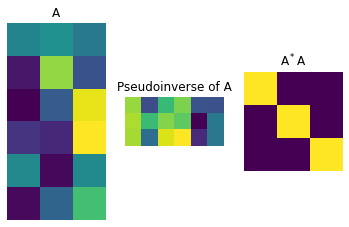

In [11]:
# pseudoinverse of rectangular matrix A
## (Detailed in SVD)

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

In [12]:
# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))

rank = 49


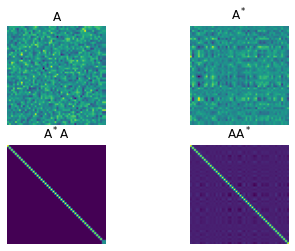

In [13]:
# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()

In [14]:
# Code practice 4: Pseudoinverse of invertible matrix

# pseudoinver is the same as the 'real' inverse of invertible matrix
m=5
A = np.random.randn(m,m)

AinvF = np.linalg.inv(A)
AinvP = np.linalg.pinv(A)

print(np.round(AinvF, 3))
print()
print(np.round(AinvP, 3))
print()

print(np.round(A@AinvF))
print()
print(np.round(A@AinvP))
print()

[[-5.505  2.338  2.366  1.584 -1.631]
 [-3.326  1.013  1.082  0.803 -1.13 ]
 [-1.415  0.042  0.667  0.608 -0.516]
 [ 0.387  0.559 -0.459  0.017 -0.147]
 [ 7.634 -3.074 -3.433 -2.151  2.933]]

[[-5.505  2.338  2.366  1.584 -1.631]
 [-3.326  1.013  1.082  0.803 -1.13 ]
 [-1.415  0.042  0.667  0.608 -0.516]
 [ 0.387  0.559 -0.459  0.017 -0.147]
 [ 7.634 -3.074 -3.433 -2.151  2.933]]

[[ 1. -0.  0.  0. -0.]
 [-0.  1.  0.  0.  0.]
 [-0. -0.  1.  0.  0.]
 [-0.  0.  0.  1. -0.]
 [ 0.  0. -0.  0.  1.]]

[[ 1. -0. -0. -0.  0.]
 [-0.  1.  0.  0. -0.]
 [ 0. -0.  1. -0.  0.]
 [ 0. -0. -0.  1.  0.]
 [-0.  0.  0.  0.  1.]]

